

## Exploratory Data Analysis (EDA) Notebook Outline

### 1. Introduction
- **Purpose**: In this section, I recap the primary objective of the EDA, which is to thoroughly explore the cleaned and sampled dataset to uncover underlying patterns, confirm the effectiveness of the preprocessing, and prepare for predictive modeling.
- **Dataset Description**: I provide a concise overview of the dataset, including its origins, the rationale behind the sampling method, and a note on the preprocessing steps already completed.

### 2. Data Overview
- **Dataset Summary**: I will offer a quick summary of the dataset's size, structure, and key variables, emphasizing the state post-sampling.
- **Data Types and Completeness**: I review the data types of the columns in the dataset and discuss the absence of significant missing values due to prior cleaning.

### 3. Univariate Analysis
- **Distributions**: I analyze the distributions of key numerical variables such as `fare_amount`, `trip_distance`, and `trip_duration`. I will use histograms or box plots to visualize these distributions and confirm the effectiveness of earlier data cleaning steps.
- **Outliers**: I will discuss the approach taken for outliers during the preprocessing phase and assess the impact of these decisions on the data distribution.

### 4. Bivariate and Multivariate Analysis
- **Correlation Matrix**: I construct a heatmap to visualize the correlations between numerical variables, identifying any strong correlations between features and the target variable (`fare_amount`).
- **Pair Plots**: I use pair plots to explore relationships between pairs of variables, which is crucial for spotting trends, correlations, and potential multicollinearity issues.
- **Categorical Analysis**: I examine how categorical variables such as `time of day`, `day of the week`, and `season` affect `fare_amount`. I will use box plots or violin plots to show fare distributions across different categories, verifying hypotheses about temporal and categorical impacts on fares.

### 5. Feature Relationships
- **Feature vs. Fare Analysis**: I investigate the relationships between features and the target variable (`fare_amount`). For example, I will plot `fare_amount` against `trip_distance` to analyze how fare varies with distance traveled.
- **Temporal and Spatial Insights**: I analyze the influence of temporal features (e.g., time of day, day of the week) and spatial features (e.g., pickup and dropoff locations) on taxi fares.

### 6. Insights and Hypotheses
- **Summary of Insights**: I summarize key findings from the univariate, bivariate, and multivariate analyses. I highlight significant patterns, trends, or anomalies discovered in the cleaned and sampled data.
- **Hypotheses Formulation**: Based on visualizations and statistical analysis, I formulate hypotheses that could guide the subsequent modeling phase. I propose potential factors that are likely to influence taxi fares based on observed relationships.

### Conclusion
- **Review of Findings**: I summarize the essential insights and their implications for the predictive modeling phase.
- **Next Steps**: I outline how these findings will inform the development of the predictive model, including potential modifications to feature selection and model strategies based on EDA results.


# Imports and Installations

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# More advanced visualizations
from pandas.plotting import scatter_matrix

# Date and time manipulation
from pandas.tseries.holiday import USFederalHolidayCalendar
import datetime as dt
from scipy import sparse

# Geospatial analysis (if needed for analyzing location data)
import geopandas as gpd
from shapely.geometry import Point


# Statistics
from scipy import stats
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Handling large datasets, if required (comment out if not using Dask)
# import dask.dataframe as dd

# Machine learning libraries for feature selection techniques (if explored during EDA)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Setting options for better readability of outputs
pd.set_option('display.max_columns', None)  # Adjust as per your dataset specifics
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Limiting float output to 3 decimal places
sns.set(style="whitegrid")  # Setting style for seaborn plots





# 1. Introduction to Taxi Fare Prediction Research

### Abstract
In Tbilisi, Georgia, the taxi service industry is marred by an unregulated and informal fare system, leading to significant discrepancies and a general lack of fare transparency. This situation starkly contrasts with the structured fare system of New York City (NYC), where taxi operations are well-documented and adhere to strict regulatory standards. Through this study, I leverage the comprehensive NYC yellow taxi trip dataset from 2023, a year marked by significant data richness following the pandemic. My aim is to develop a predictive fare model using advanced machine learning techniques to examine key fare determinants, thereby setting a foundation to propose a more structured and transparent fare system for Tbilisi.

### Background
The taxi industry in Tbilisi faces critical challenges related to fare consistency and transparency, impacting both local residents and tourists who are often unfamiliar with standard rates, making them vulnerable to overcharging. In contrast, NYC's regulated taxi system presents an exemplary model of operational transparency with meticulously recorded data and standardized fare calculations, including base fare rates, surcharges, and costs associated with distance and time.

### Research Objective
My primary research objective is to harness the structured approach of NYC's taxi fare system to develop a predictive model capable of estimating taxi fares in Tbilisi. By identifying the factors that significantly affect fare variations—such as trip distances, timing, and external conditions like public events—I aim to enhance fare predictability and transparency within Tbilisi’s taxi services.

### Data Source
The data for this study is sourced from the NYC Taxi and Limousine Commission’s 2023 yellow taxi trip records, available through the NYC Open Data portal. This dataset is rich with detailed trip records including pickup and dropoff times, locations, distances, and fares. Analyzing this data will allow me to understand the factors influencing taxi fares in a regulated environment and apply these insights to the Georgian context.

### Methodological Approach
1. **Data Acquisition and Preparation**: We have cleaned and prepared the data for analysis in the first 2 notebooks. 
   
2. **Feature Engineering**: We have cerated interesting features based on domain knowledge and lit review in our 3rd notebook and sampled the resulting dataset for easier memory management.
   
3. **Predictive Modeling**: I will evaluate various machine learning models, including linear regression, decision trees, and ensemble methods like random forest and gradient boosting to determine the most effective approach for fare prediction.
   
4. **Model Adaptation and Validation**: The best-performing model will be carefully adapted to reflect the specific conditions of Tbilisi, followed by rigorous validation to ensure its accuracy and reliability.

### Significance
This research aims to bridge the gap between the unregulated taxi fare systems and a structured, transparent fare management approach. By adopting and adapting methodologies that have proven effective in NYC, I intend to propose viable solutions that could lead to significant policy reforms and technological enhancements in Tbilisi’s taxi fare system.

### Expected Outcomes
I expect this project to yield a scalable and adaptable fare prediction model that can be utilized not only in Tbilisi but also in other cities facing similar regulatory challenges. The findings from this study could influence regulatory changes, improve customer satisfaction, and enhance the overall competitiveness of the taxi industry in less regulated environments.


## 1.1 Dataset Description

In our notebook 1 and 2 we have cleaned the dataset and prepared it for feature engineering, which we did in our 3rd notebook where we created relavant features and sampled the resulting dataset for further analysis. 

In the 1st notebook we downloaded 12 parquet files from NYC taxi services website which we than combined for further analysis. 

Initial dataset had more than 30 million rows, nulls and negative values and duplicates were corrected and cleaned, irrelavant features like ratecodeID, str_wd_flag... were dropped. Features with extreme or unreasonable values were adjusted outliers were removed. 

After initial data preparation and cleaning we moved on to feature engineering where we developed necessary features like time of day, day of week, month, season, passenger count trip duration, speed. adjusted for outliers based on statistics and domain knowledge like speed limits or max distance trips or max passanger count in NYC permitted by law. etc and retained the data that was relavant for further analysis. 

We sampled the dataset based on stratirifcation which ensured that all the seasons, passenger counts were represented in the sampled version of our dataset which is crucial for our analysis. 

In [2]:
df = pd.read_parquet('sampled_taxi_dataset_v.0.parquet')

In [3]:
len(df)

2809395

In [4]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,JFK_LGA_Pickup_Fee,General_Airport_Fee,distance_bins,pickup_time_of_day,pickup_season,passenger_count_category,pickup_day_type,transaction_year,transaction_month,transaction_day,transaction_hour,trip_duration,trip_duration_hours,PUzone,PUborough,DOzone,DOborough,is_holiday,speed_mph
19276873,2023-09-08 16:45:01,2023-09-08 17:05:23,1,2.320,161,79,1,19.100,2.500,5.120,30.720,0.000,0.000,2-5 miles,afternoon,autumn,low,weekday,2023,9,8,16,20.367,0.339,Midtown Center,Manhattan,East Village,Manhattan,0,6.835
25505385,2023-11-28 13:35:55,2023-11-28 13:54:51,1,1.900,162,68,1,17.700,0.000,3.500,25.200,0.000,0.000,1-2 miles,afternoon,autumn,low,weekday,2023,11,28,13,18.933,0.316,Midtown East,Manhattan,East Chelsea,Manhattan,0,6.021
23056552,2023-10-28 14:08:05,2023-10-28 14:17:02,1,1.100,151,75,1,8.600,0.000,2.000,12.100,0.000,0.000,1-2 miles,afternoon,autumn,low,weekend,2023,10,28,14,8.950,0.149,Manhattan Valley,Manhattan,East Harlem South,Manhattan,0,7.374
22171336,2023-10-18 12:48:57,2023-10-18 12:57:55,1,1.000,161,142,1,10.000,2.500,2.000,16.000,0.000,0.000,1-2 miles,afternoon,autumn,low,weekday,2023,10,18,12,8.967,0.149,Midtown Center,Manhattan,Lincoln Square East,Manhattan,0,6.691
25241061,2023-11-24 14:51:27,2023-11-24 14:57:14,1,1.070,238,151,1,7.900,0.000,2.980,14.880,0.000,0.000,1-2 miles,afternoon,autumn,low,weekday,2023,11,24,14,5.783,0.096,Upper West Side North,Manhattan,Manhattan Valley,Manhattan,0,11.101


# 2. Dataset  Overview 

Our sampled dataset has 10% of the cleaned initial dataset sampled stratifically so that all features remain intact above we see the reamainer of the cleaned dataset that was sampled. 

In [5]:
df.dtypes

tpep_pickup_datetime        datetime64[us]
tpep_dropoff_datetime       datetime64[us]
passenger_count                      int64
trip_distance                      float64
PULocationID                         int64
DOLocationID                         int64
payment_type                         int64
fare_amount                        float64
extra                              float64
tip_amount                         float64
total_amount                       float64
JFK_LGA_Pickup_Fee                 float64
General_Airport_Fee                float64
distance_bins                     category
pickup_time_of_day                  object
pickup_season                       object
passenger_count_category          category
pickup_day_type                     object
transaction_year                     int32
transaction_month                    int32
transaction_day                      int32
transaction_hour                     int32
trip_duration                      float64
trip_durati

lets convert the objects into categories for faster processing. 

In [6]:

df['payment_type'] = df['payment_type'].astype('category')
df['PULocationID'] = df['PULocationID'].astype('category')
df['DOLocationID'] = df['DOLocationID'].astype('category')
df['pickup_time_of_day'] = df['pickup_time_of_day'].astype('category')
df['pickup_season'] = df['pickup_season'].astype('category')
df['pickup_day_type'] = df['pickup_day_type'].astype('category')
df['PUzone'] = df['PUzone'].astype('category')
df['PUborough'] = df['PUborough'].astype('category')
df['DOzone'] = df['DOzone'].astype('category')
df['DOborough'] = df['DOborough'].astype('category')


In [7]:
categorical_columns = [
    'PULocationID', 'DOLocationID', 'payment_type', 'distance_bins',
    'pickup_time_of_day', 'pickup_season', 'passenger_count_category',
    'pickup_day_type', 'PUzone', 'PUborough', 'DOzone', 'DOborough', 'is_holiday'
]

# Print descriptive statistics for each categorical column
for column in categorical_columns:
    print(f"--- Descriptive Statistics for {column} ---")
    print(df[column].describe())
    print("\n")

--- Descriptive Statistics for PULocationID ---
count     2809395
unique        254
top           132
freq       187116
Name: PULocationID, dtype: int64


--- Descriptive Statistics for DOLocationID ---
count     2809395
unique        261
top           236
freq       114445
Name: DOLocationID, dtype: int64


--- Descriptive Statistics for payment_type ---
count     2809395
unique          4
top             1
freq      2328408
Name: payment_type, dtype: int64


--- Descriptive Statistics for distance_bins ---
count       2809395
unique            6
top       1-2 miles
freq        1220201
Name: distance_bins, dtype: object


--- Descriptive Statistics for pickup_time_of_day ---
count       2809395
unique            4
top       afternoon
freq         995638
Name: pickup_time_of_day, dtype: object


--- Descriptive Statistics for pickup_season ---
count     2809395
unique          4
top        spring
freq       758631
Name: pickup_season, dtype: object


--- Descriptive Statistics for pass



1. **PULocationID** and **DOLocationID**: Both pickup and dropoff location IDs show a wide variety of unique values (254 and 261, respectively), indicating diverse locations for pickups and dropoffs. The most frequent pickup location (ID 132) appears 187,116 times, while the most frequent dropoff location (ID 236) appears 114,445 times. This suggests some locations are more popular than others, possibly key transport hubs or commercial areas.

2. **Payment Type**: There are 4 unique types of payment, with type '1' being the most frequent, accounting for 2,328,408 transactions. This dominance suggests that type '1' is likely the most conventional or preferred payment method (e.g., cash or a specific type of credit card).

3. **Distance Bins**: The six unique categories for trip distances with '1-2 miles' being the most common (1,220,201 instances). This indicates that shorter trips are more prevalent in this dataset.

4. **Pickup Time of Day**: There are four unique time periods with 'afternoon' being the most common segment, which could reflect higher activity or demand during these hours.

5. **Pickup Season**: Similarly, the data spans four seasons, with 'spring' being the top season for pickups. This could be due to weather conditions being more favorable or higher tourist activity during this period.

6. **Passenger Count Category**: With three categories available, 'low' is the predominant category, suggesting that trips typically have fewer passengers, potentially single riders or rides with minimal companions.

7. **Pickup Day Type**: The binary category of 'weekday' vs 'weekend' shows a higher frequency of rides on weekdays (2,035,540), which might be linked to commuting patterns or business-related travel.

8. **PUzone** and **DOzone**: These zones, representing specific areas within the broader location IDs, also show a variety of unique values. 'JFK Airport' as the top pickup zone and 'Upper East Side North' as the top dropoff zone highlight significant flow of rides to/from the airport and a residential area, respectively.

9. **PUborough** and **DOborough**: Both show Manhattan as the top borough for pickups and dropoffs, which is not surprising given its status as a dense commercial and residential hub. Manhattan being the top borough in both categories (2,417,898 pickups and 2,428,426 dropoffs) underscores its central role in urban mobility within the dataset.

10. **Is Holiday**: The 'is_holiday' field shows a very low mean (0.022), indicating that the vast majority of trips did not occur on holidays. This could imply regular commuting or daily travel patterns dominate the dataset.


In [8]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,JFK_LGA_Pickup_Fee,General_Airport_Fee,transaction_year,transaction_month,transaction_day,transaction_hour,trip_duration,trip_duration_hours,is_holiday,speed_mph
count,2809395,2809395,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000,2809395.000
mean,2023-07-01 05:36:50.292566,2023-07-01 05:57:11.048096,1.401,4.258,22.855,1.682,4.074,32.750,0.011,0.170,2023.000,6.488,15.500,14.332,20.346,0.339,0.022,12.251
min,2023-01-01 00:00:09,2023-01-01 00:09:24,1.000,1.000,2.000,0.000,0.000,4.000,0.000,0.000,2023.000,1.000,1.000,0.000,1.050,0.018,0.000,0.042
25%,2023-04-01 18:13:40.500000,2023-04-01 18:34:08.500000,1.000,1.500,11.400,0.000,1.260,18.700,0.000,0.000,2023.000,4.000,8.000,11.000,10.250,0.171,0.000,7.755
50%,2023-06-25 03:11:10,2023-06-25 03:27:25,1.000,2.260,16.300,1.000,3.280,23.880,0.000,0.000,2023.000,6.000,15.000,15.000,15.200,0.253,0.000,10.333
75%,2023-10-04 20:19:16.500000,2023-10-04 20:38:23,1.000,4.360,25.400,2.500,5.000,35.100,0.000,0.000,2023.000,10.000,23.000,19.000,23.450,0.391,0.000,14.504
max,2023-12-31 23:51:23,2023-12-31 23:59:34,6.000,49.990,300.000,13.750,250.000,397.800,1.250,1.750,2023.000,12.000,31.000,23.000,1439.917,23.999,1.000,99.692
std,NaN,NaN,0.890,4.818,18.378,1.906,4.282,23.457,0.118,0.507,0.000,3.454,8.696,5.898,42.328,0.705,0.148,6.889


#### Summary Statistics Overview
- **Number of Records**: The dataset consists of 2,809,395 trips, providing a robust sample size for detailed analysis.
- **Time Variables**: `tpep_pickup_datetime` and `tpep_dropoff_datetime` range throughout the year 2023, indicating comprehensive coverage over different times of the day and year.
- **Passenger Count**: On average, there are 1.401 passengers per trip, with most trips carrying just one passenger.
- **Trip Distance**: The trips cover an average distance of 4.258 miles, ranging from a minimum of 1 mile to nearly 50 miles, showing varied trip lengths.
- **Location IDs**: `PULocationID` and `DOLocationID` suggest trips are well-distributed across different areas, covering 265 unique taxi zones.
- **Payment Type**: Most transactions are electronic, with an average code of 1.186 indicating predominant credit card usage.
- **Fare Amounts**: Average fare amounts to $22.855, with fares ranging as high as $300, highlighting the variability in trip costs.
- **Additional Charges**: Includes `extra`, `tip_amount`, and two types of airport fees, reflecting the complexity of fare calculations which include tips and surcharges.
- **Temporal Features**: The `transaction_year`, `transaction_month`, `transaction_day`, and `transaction_hour` provide granular temporal details for deeper time series analysis.
- **Trip Duration**: Measured in minutes, the average trip duration is approximately 20.346 minutes, with trips lasting up to almost 24 hours.
- **Speed**: Calculated as miles per hour, the average speed is 12.251 mph, which is indicative of urban driving conditions that often include frequent stops and lower speeds.

#### Data Characteristics
The dataset's structure and detailed attributes enable a comprehensive analysis of factors influencing taxi fares. The rich temporal and spatial data, coupled with fare components and trip characteristics, are ideal for understanding the dynamics of taxi usage and pricing in an urban environment. This exploration will not only provide insights into NYC's taxi operations but will also form the basis for developing a fare prediction model that could be adapted for Tbilisi, enhancing transparency and predictability in its taxi fare system. 

In the subsequent sections, we will delve deeper into the data, exploring univariate, bivariate, and multivariate relationships to uncover patterns and formulate hypotheses for predictive modeling. This structured approach will ensure a thorough understanding of the key factors influencing taxi fares and will aid in the design of an effective fare management strategy for Tbilisi.

# 3. Univariate Analysis 

#### Methodology Overview

Univariate analysis is the simplest form of analyzing data. "Uni" means "one", so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. In the context of this research, univariate analysis will allow us to explore each variable in isolation to understand its distribution, central tendency, variability, and potential presence of outliers. This is a critical step before moving into more complex multivariate analysis, as it ensures a solid understanding of the individual features which could influence the predictive modeling of taxi fares.

For our taxi fare prediction model, the univariate analysis helps to set the stage by:
- **Identifying patterns** or irregularities in data distributions that could influence model performance.
- **Spotting outliers** which might be errors or legitimate extreme values that need different handling.
- **Understanding the central tendency** (mean, median) and dispersion (variance, standard deviation) of our data, which can inform data transformation decisions later on.

#### Step-by-Step Outline for Univariate Analysis

1. **Visualizing Distributions of Numerical Variables**
   - Plot histograms or density plots to visualize the distributions of continuous variables such as `fare_amount`, `trip_distance`, `trip_duration`, and `speed_mph`.
   - This helps in understanding the skewness of the distributions and identifying any outliers that may affect the modeling.

2. **Summarizing Central Tendency and Dispersion**
   - Calculate and interpret the mean, median, and mode for continuous variables to understand typical values and central locations.
   - Analyze measures of dispersion such as range, interquartile range (IQR), variance, and standard deviation to grasp the spread of the data.

3. **Analyzing Counts of Categorical Variables**
   - Create bar charts to visualize the frequencies of categories within categorical variables such as `payment_type`, `pickup_time_of_day`, `pickup_season`, `pickup_day_type`, and location identifiers.
   - This will help to confirm the prevalence of different categories and may uncover any imbalances that could influence model training.

4. **Identifying Outliers**
   - Use box plots to visualize outliers in key variables. Box plots display the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
   - Investigate extreme values to decide whether they are data entry errors or legitimate extremes that should be included or treated separately in the analysis.

5. **Exploring Data Quality Issues**
   - Check for any anomalies like very high trip durations or distances that are unusually low or high, which could indicate data quality issues.
   - Address any implausible or impossible values discovered during the descriptive statistical analysis.

#### Incorporating Findings into the Research
- **Documentation**: Record findings from the univariate analysis, especially any decisions made regarding data handling or transformations.
- **Impact on Model Development**: Adjustments made based on univariate analysis findings (like transforming skewed data, handling outliers, or encoding categorical variables) will directly affect the modeling phase. These adjustments help in developing a more robust and accurate predictive model.

This section ensures a thorough exploration of each variable, setting a solid foundation for more complex analyses and ensuring that the data fed into the predictive models is well-understood and appropriately prepared.

## 3.1 Visualizing Distributions Of Numerical Variables

### 3.1.1 Fare Amount 

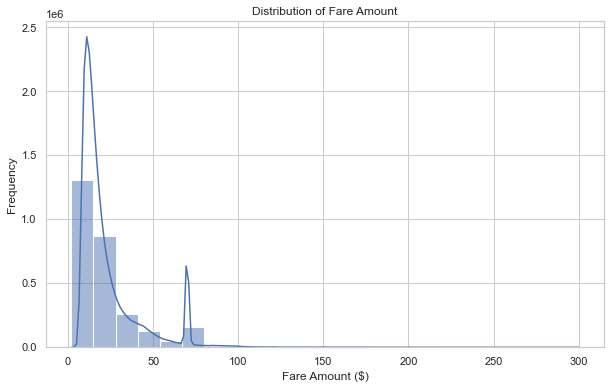

In [9]:
#num_bins = int(np.sqrt(len(df['fare_amount'])))
#Sturges' rule is a more sophisticated approach that considers 
#the logarithm of the number of data points. It’s particularly 
#useful for larger datasets as it tends 
#to produce a smaller number of bins than the square-root rule.

num_bins = int(np.ceil(1 + np.log2(len(df['fare_amount']))))


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for Fare Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=num_bins, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()


#### Fare Amount Distribution
* Observations: The histogram for fare_amount shows a highly right-skewed distribution with a significant peak at lower fare amounts, typically below $50. There are noticeable smaller peaks at higher fare ranges, suggesting that while most rides are relatively inexpensive, there are still a significant number of higher fare rides.
* Insights: The distribution indicates that most taxi trips are short, possibly within a single city zone, leading to lower fares. The long tail suggests occasional longer trips or trips with additional charges that significantly increase the fare.

### 3.1.2 Trip Duration

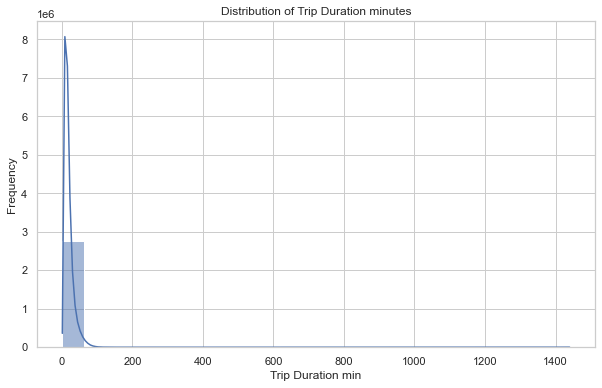

In [10]:
num_bins = int(np.ceil(1 + np.log2(len(df['trip_duration']))))

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for Fare Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=num_bins, kde=True)
plt.title('Distribution of Trip Duration minutes')
plt.xlabel('Trip Duration min')
plt.ylabel('Frequency')
plt.show()



#### Trip Duration Distribution
* Observations: The trip_duration histogram reveals a strong right skew, with most trips lasting under 200 minutes. However, there is a long tail extending towards the 1400 minutes mark, indicating some extremely long trips.
* Insights: The majority of taxi trips are brief, which aligns with urban travel patterns. The long tail could include outliers or data errors, or it might represent long-duration rentals where taxis are hired for extended periods.

### 3.1.3 Trip Distance

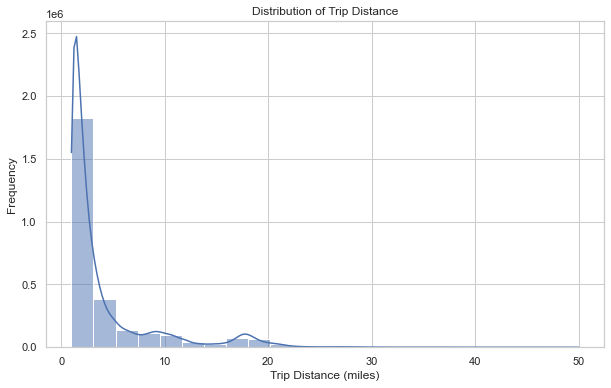

In [11]:
num_bins = int(np.ceil(1 + np.log2(len(df['trip_distance']))))
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=num_bins, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()



#### Trip Distance Distribution
* Observations: Similar to trip_duration, the trip_distance histogram is also right-skewed with most trips covering distances of 10 miles or less. The frequency decreases rapidly with increasing distance, but there are still some trips extending up to 50 miles.
* Insights: This distribution supports the urban taxi usage pattern where short trips dominate. Longer trips are less frequent but indicate the service area might include trips to or from airports or between cities.

### 3.1.4 Trip Speed

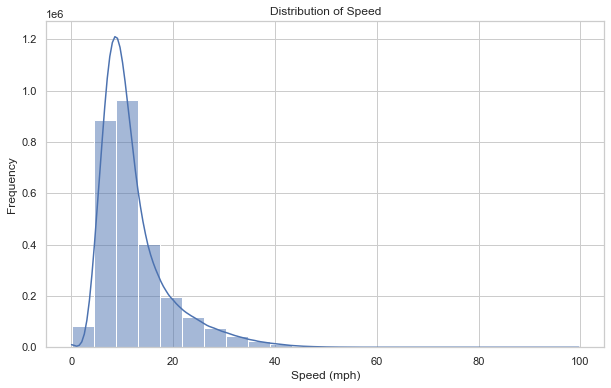

In [12]:
num_bins = int(np.ceil(1 + np.log2(len(df['speed_mph']))))
plt.figure(figsize=(10, 6))
sns.histplot(df['speed_mph'], bins=num_bins, kde=True)
plt.title('Distribution of Speed')
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')
plt.show()




#### Speed Distribution
* Observations: The speed histogram shows a moderately right-skewed distribution with a peak around 10 to 20 mph, which is typical for urban driving conditions involving frequent stops and lower speeds due to traffic.
* Insights: The modal speed range likely reflects city driving conditions. The distribution's tail towards higher speeds could represent less frequent highway trips or trips occurring during less congested times.

### 3.1.5 Tip Amount 

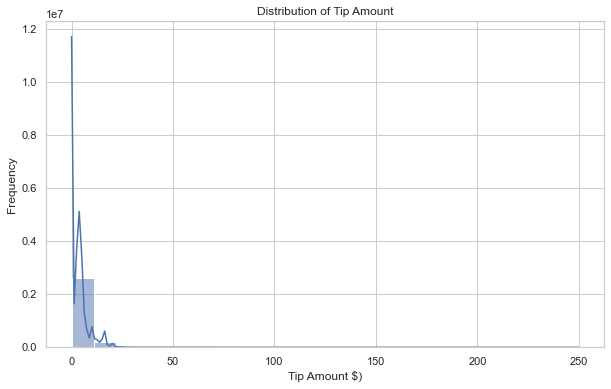

In [13]:
num_bins = int(np.ceil(1 + np.log2(len(df['tip_amount']))))
plt.figure(figsize=(10, 6))
sns.histplot(df['tip_amount'], bins=num_bins, kde=True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount $)')
plt.ylabel('Frequency')
plt.show()


#### Tip Amount Distribution
* Observations: The distribution of tip_amount is extremely right-skewed, with most tips being quite small but with some very large tips extending out to $250.
* Insights: Most passengers tip modestly, aligning with typical percentages of the fare. The presence of very high tips might be due to exceptionally good service, high fare trips, or possibly data entry errors.

#### General Implications for Modeling
* Transformations: Given the skewness in these distributions, log transformations might be necessary to normalize the data for modeling purposes.
* Outlier Handling: The long tails in all distributions suggest that outlier handling will be crucial to avoid skewing the model with extreme values.
* Feature Engineering: Given the patterns observed, especially with fare amounts and trip distances, combining these features or creating ratios might yield useful predictors for fare prediction models.

## 3.2 Summarizing Central Tendency and Dispersion

In [14]:
# Calculate and display summary statistics for numerical variables
numerical_vars = ['fare_amount', 'trip_distance', 'trip_duration', 'speed_mph']
summary_stats = df[numerical_vars].describe()
print(summary_stats)

# Additionally calculate the mode for each variable
modes = df[numerical_vars].mode().loc[0]
print("\nModes:\n", modes)


       fare_amount  trip_distance  trip_duration   speed_mph
count  2809395.000    2809395.000    2809395.000 2809395.000
mean        22.855          4.258         20.346      12.251
std         18.378          4.818         42.328       6.889
min          2.000          1.000          1.050       0.042
25%         11.400          1.500         10.250       7.755
50%         16.300          2.260         15.200      10.333
75%         25.400          4.360         23.450      14.504
max        300.000         49.990       1439.917      99.692

Modes:
 fare_amount     70.000
trip_distance    1.000
trip_duration   11.233
speed_mph        9.000
Name: 0, dtype: float64



### Summary Statistics Explained

1. **Count**
   - Each of the variables (`fare_amount`, `trip_distance`, `trip_duration`, `speed_mph`) has a count of 2,809,395, indicating there are no missing values in these columns for the dataset analyzed.

2. **Mean (Average)**
   - **`fare_amount`**: The average fare amount is $22.855, suggesting that the typical cost of a taxi ride falls around this value.
   - **`trip_distance`**: The average trip distance is approximately 4.258 miles per trip.
   - **`trip_duration`**: The average trip lasts about 20.346 minutes.
   - **`speed_mph`**: The average speed of the taxis is about 12.251 mph.

3. **Standard Deviation**
   - Indicates the variability or spread of the data from the mean.
   - **`fare_amount`** has a standard deviation of 18.378, indicating a wide variation in fare amounts, which could be due to factors like trip distance, time of day, or specific route characteristics.
   - **`trip_distance`** and **`trip_duration`** also show considerable variability, as evidenced by their standard deviations of 4.818 and 42.328, respectively.
   - **`speed_mph`** has a standard deviation of 6.889, showing variability in speed, likely influenced by traffic conditions, time of day, etc.

4. **Minimum and Maximum (Range)**
   - **`fare_amount`** ranges from 2.00 to 300.00, indicating some trips are very cheap, while others are quite expensive.
   - **`trip_distance`** ranges from 1 to almost 50 miles, showing some very short and some long-distance trips.
   - **`trip_duration`** ranges from about 1 minute to over 1439 minutes (almost 24 hours), which may include outliers or errors.
   - **`speed_mph`** ranges from nearly stationary (0.042 mph) to very fast (99.692 mph).

5. **Quartiles (25%, 50% Median, 75%)**
   - The 25th, 50th (median), and 75th percentiles provide insights into the distribution of data.
   - The median (50%) provides a good indicator of the central tendency without the influence of outliers and extreme values.
   - For instance, the median `fare_amount` is 16.300, less than the mean, indicating a right-skewed distribution where more expensive rides pull the average up.

6. **Mode**
   - The mode represents the most frequently occurring value in each variable.
   - **`fare_amount`** mode is 70.00, indicating that this fare amount occurs more frequently than any other.
   - **`trip_distance`** has a mode of 1 mile, suggesting that 1-mile trips are the most common.
   - **`trip_duration`** mode is approximately 11.233 minutes, and **`speed_mph`** mode is 9 mph, further indicating common conditions or typical trips.

### Interpretation and Implications for Modeling

These statistics are essential for:
- **Identifying outliers**: Extremely high values in `fare_amount`, `trip_duration`, or unusually high or low values in `speed_mph` may indicate data entry errors or special cases.
- **Understanding distributions**: Knowledge of skewness helps in deciding whether to transform data before modeling, for example, using logarithmic transformations to normalize right-skewed data.
- **Preparing for predictive modeling**: Insights from the distribution of these variables help in feature engineering and in choosing the right model by understanding the relationships and scales involved.


## 3.3 Analyzing Counts of Categorical Variables

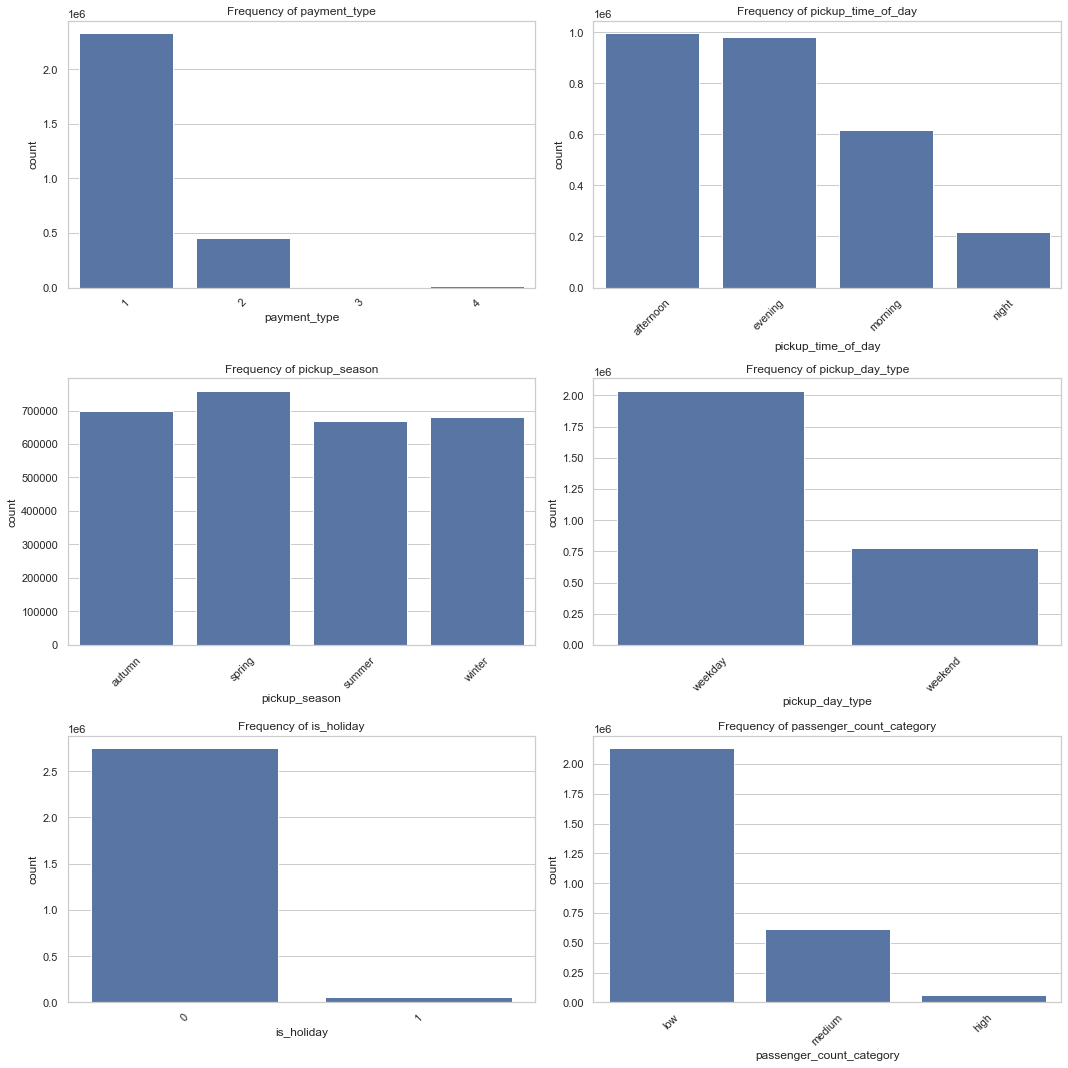

In [15]:
# List of categorical variables to plot
categorical_vars = ['payment_type', 'pickup_time_of_day', 'pickup_season', 'pickup_day_type','is_holiday','passenger_count_category']

plt.figure(figsize=(15, 15))  
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)  
    sns.countplot(x=var, data=df)
    plt.title(f'Frequency of {var}')
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()




### 1. Frequency of `payment_type`
- **Observations**: The bar chart shows that one type of payment is overwhelmingly more common than others. Assuming typical payment type encoding, it's likely that this category represents credit card payments, which are more frequently used than cash in many urban taxi systems.
- **Implications**: This dominance of one payment type could affect model training if payment type is a feature, as the model might not learn well about the less common payment types.

### 2. Frequency of `pickup_time_of_day`
- **Observations**: The chart shows that afternoon and evening are the busiest times for taxi pickups, with morning being slightly less busy and night pickups being the least frequent.
- **Implications**: This information is valuable for demand forecasting and could be used to adjust service availability or pricing strategies during peak times.

### 3. Frequency of `pickup_season`
- **Observations**: The pickups are quite evenly distributed across different seasons with slight variations, suggesting a fairly steady demand throughout the year.
- **Implications**: Seasonal variations are not drastic, but slight increases in Spring and Autumn could be due to tourism or other seasonal activities.

### 4. Frequency of `pickup_day_type`
- **Observations**: There are significantly more pickups on weekdays than weekends.
- **Implications**: This likely reflects commuting patterns, where weekdays have higher taxi usage due to work-related travel.

### 5. Frequency of `is_holiday`
- **Observations**: Taxi usage on non-holidays vastly outweighs holiday usage, indicating regular day operations are the primary source of trips.
- **Implications**: The low frequency on holidays might suggest a decrease in demand or availability, which could be important for planning or promotional efforts.

### 6. Frequency of `passenger_count_category`
- **Observations**: Most trips involve a low number of passengers, with fewer trips as passenger numbers increase.
- **Implications**: Most taxis are serving one or two passengers. Trips with medium to high passenger counts are less frequent and could possibly require different types of vehicles or service considerations.

### General Insights
- **Modeling Considerations**: The uneven distributions observed in several of these categories could impact the performance of predictive models, especially if certain categories are underrepresented in the training data. Techniques like oversampling or stratified sampling might be needed to address this.
- **Service Optimization**: Understanding the patterns in these categorical variables can help in optimizing taxi operations, such as deploying more taxis during peak times and less during low-demand periods.
- **Feature Engineering**: The knowledge about when (time of day, day type) and how (payment type, passenger count) taxis are used can be leveraged to create interaction features that might improve model predictions.

## 3.4 Identifying Outliers 

Based on the above statistics and plots we can gain insights on outliers for our dataset and adjust it accordingly. 

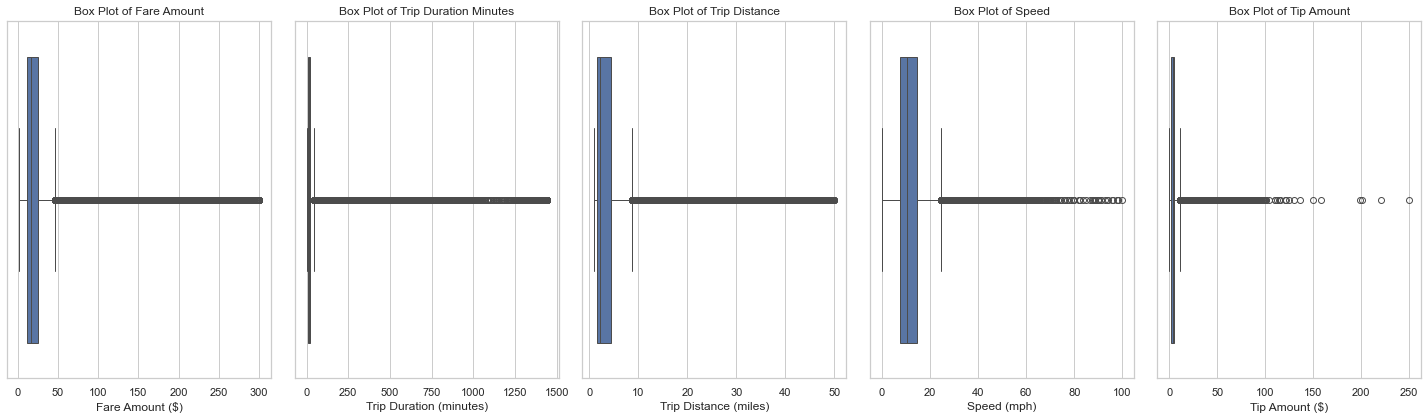

In [16]:


# Set the size of the entire figure
plt.figure(figsize=(20, 6))

# Create a subplot for the fare amount
plt.subplot(1, 5, 1)  # 1 row, 5 columns, 1st subplot
sns.boxplot(x=df['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.xlabel('Fare Amount ($)')

# Create a subplot for the trip duration
plt.subplot(1, 5, 2)  # 1 row, 5 columns, 2nd subplot
sns.boxplot(x=df['trip_duration'])
plt.title('Box Plot of Trip Duration Minutes')
plt.xlabel('Trip Duration (minutes)')

# Create a subplot for the trip distance
plt.subplot(1, 5, 3)  # 1 row, 5 columns, 3rd subplot
sns.boxplot(x=df['trip_distance'])
plt.title('Box Plot of Trip Distance')
plt.xlabel('Trip Distance (miles)')

# Create a subplot for the speed
plt.subplot(1, 5, 4)  # 1 row, 5 columns, 4th subplot
sns.boxplot(x=df['speed_mph'])
plt.title('Box Plot of Speed')
plt.xlabel('Speed (mph)')

# Create a subplot for the tip amount
plt.subplot(1, 5, 5)  # 1 row, 5 columns, 5th subplot
sns.boxplot(x=df['tip_amount'])
plt.title('Box Plot of Tip Amount')
plt.xlabel('Tip Amount ($)')

# Display the plot
plt.tight_layout()  # Adjust layout to make sure t


In [17]:
df_old = df.copy()

we copied the df to ensure that throughtout the notebook we have original dataset stored to return to.

## 3.5  Handling Outliers

I used high Z-score to make sure that categorical data points are represented in the filtered dataset. and z score of 10 was the most optimal option.

In [19]:
numeric_cols = ['fare_amount', 'trip_duration', 'trip_distance', 'speed_mph', 'tip_amount']

# Calculate Z-scores of absolute deviations from the median
z_scores = np.abs(df_old[numeric_cols].apply(zscore))

# Filter entries with a z-score less than the threshold (typically 3)
filtered_df = df_old[(z_scores < 10).all(axis=1)]

# Check results
print(filtered_df['is_holiday'].value_counts())


is_holiday
0    2742646
1      63022
Name: count, dtype: int64


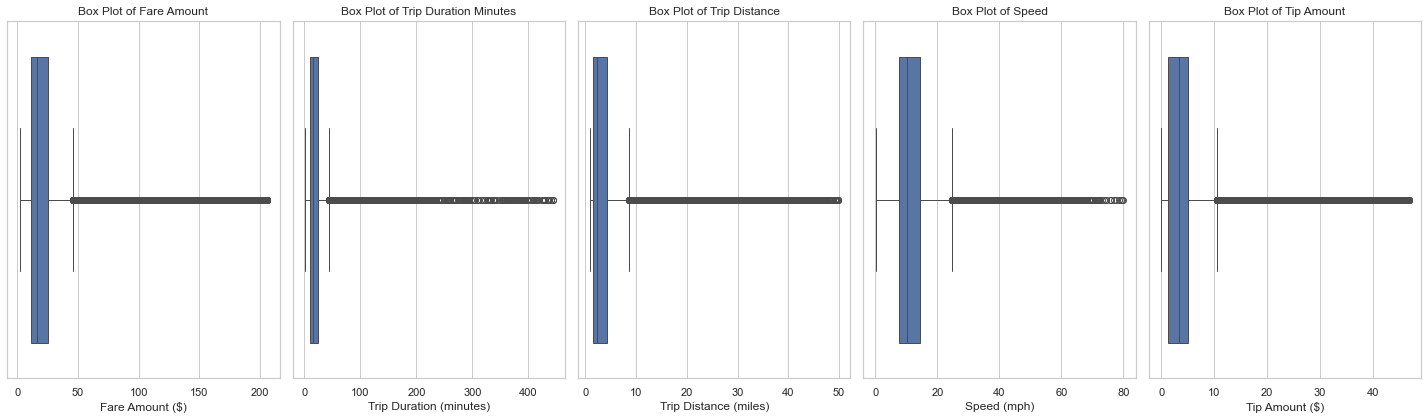

In [20]:


# Set the size of the entire figure
plt.figure(figsize=(20, 6))

# Create a subplot for the fare amount
plt.subplot(1, 5, 1)  # 1 row, 5 columns, 1st subplot
sns.boxplot(x=filtered_df['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.xlabel('Fare Amount ($)')

# Create a subplot for the trip duration
plt.subplot(1, 5, 2)  # 1 row, 5 columns, 2nd subplot
sns.boxplot(x=filtered_df['trip_duration'])
plt.title('Box Plot of Trip Duration Minutes')
plt.xlabel('Trip Duration (minutes)')

# Create a subplot for the trip distance
plt.subplot(1, 5, 3)  # 1 row, 5 columns, 3rd subplot
sns.boxplot(x=filtered_df['trip_distance'])
plt.title('Box Plot of Trip Distance')
plt.xlabel('Trip Distance (miles)')

# Create a subplot for the speed
plt.subplot(1, 5, 4)  # 1 row, 5 columns, 4th subplot
sns.boxplot(x=filtered_df['speed_mph'])
plt.title('Box Plot of Speed')
plt.xlabel('Speed (mph)')

# Create a subplot for the tip amount
plt.subplot(1, 5, 5)  # 1 row, 5 columns, 5th subplot
sns.boxplot(x=filtered_df['tip_amount'])
plt.title('Box Plot of Tip Amount')
plt.xlabel('Tip Amount ($)')

# Display the plot
plt.tight_layout()



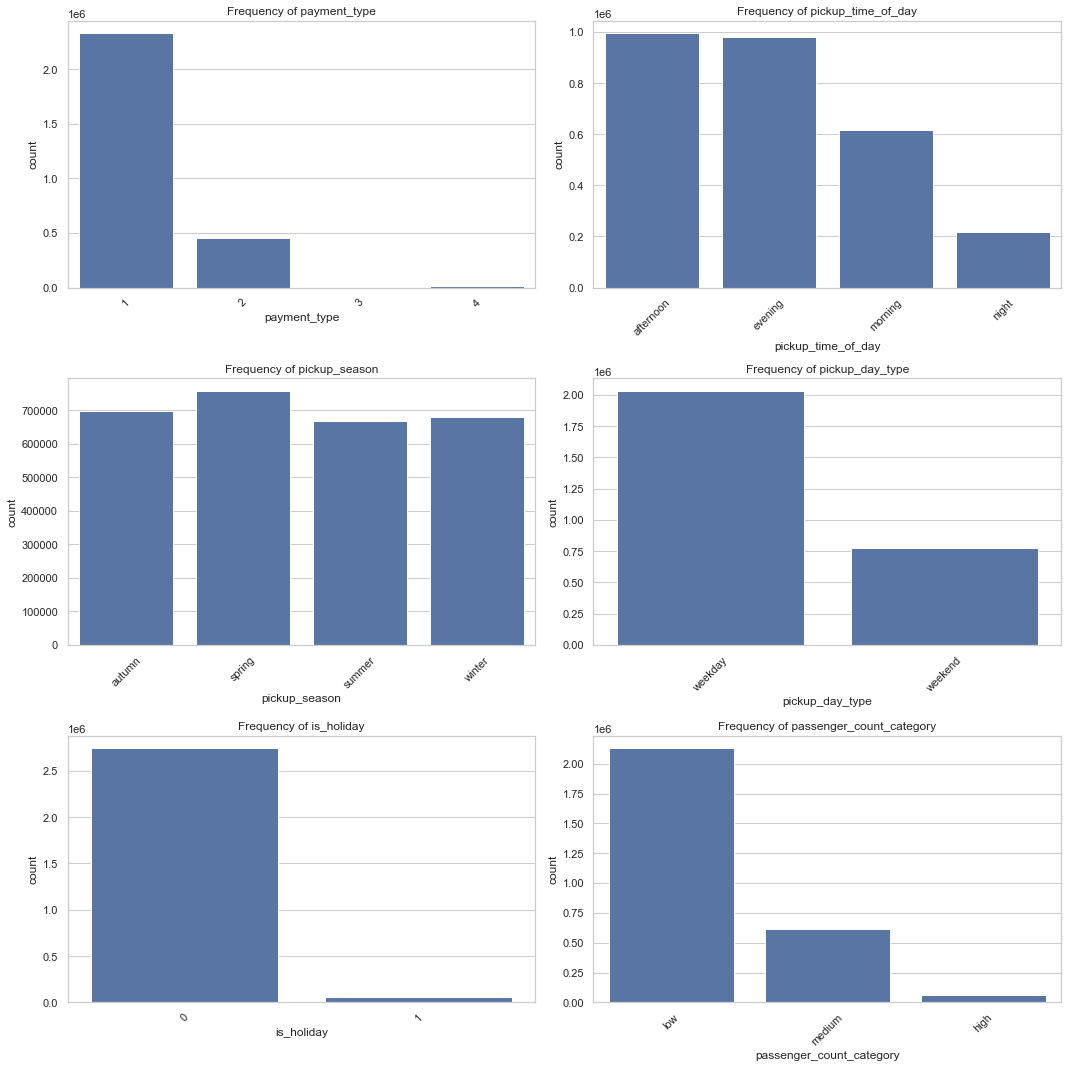

In [21]:
# List of categorical variables to plot
categorical_vars = ['payment_type', 'pickup_time_of_day', 'pickup_season', 'pickup_day_type','is_holiday','passenger_count_category']

plt.figure(figsize=(15, 15))  
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)  
    sns.countplot(x=var, data=filtered_df)
    plt.title(f'Frequency of {var}')
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Based on the numeric feature types and the outliers identified we removed outliers using high z score to ensure that all necessary categorical variables are retained for further analysis as holidas, weekdays, passanger counts all are known to effect the trip price based on the domain knowledge. 

We transformed our numeric features using logarithmic transformation to correct the right skewed data points. 

#### General Insights and Implications for Modeling
Skewness in Numerical Data: The observed skewness in distributions like fare amount and trip duration indicated the need for data transformation before modeling to normalize these variables.
Outlier Management: Properly managing outliers was essential to prevent them from skewing predictive modeling results. The capping method retained the outliers within a reasonable range, reducing their influence.
Feature Engineering: Insights from both numerical and categorical data analysis will guide the creation of interaction features and the selection of relevant variables for the predictive modeling.

## 3.6 Normalization Of Numerical Variables 

As we know that some trips on holidays cost more that usual and some categorical variables have affect on the fare amount we need to remove outliers in a way to retain the needed categorical data. 

In [22]:
new_df = filtered_df.copy()
new_df.head(3)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,JFK_LGA_Pickup_Fee,General_Airport_Fee,distance_bins,pickup_time_of_day,pickup_season,passenger_count_category,pickup_day_type,transaction_year,transaction_month,transaction_day,transaction_hour,trip_duration,trip_duration_hours,PUzone,PUborough,DOzone,DOborough,is_holiday,speed_mph
19276873,2023-09-08 16:45:01,2023-09-08 17:05:23,1,2.320,161,79,1,19.100,2.500,5.120,30.720,0.000,0.000,2-5 miles,afternoon,autumn,low,weekday,2023,9,8,16,20.367,0.339,Midtown Center,Manhattan,East Village,Manhattan,0,6.835
25505385,2023-11-28 13:35:55,2023-11-28 13:54:51,1,1.900,162,68,1,17.700,0.000,3.500,25.200,0.000,0.000,1-2 miles,afternoon,autumn,low,weekday,2023,11,28,13,18.933,0.316,Midtown East,Manhattan,East Chelsea,Manhattan,0,6.021
23056552,2023-10-28 14:08:05,2023-10-28 14:17:02,1,1.100,151,75,1,8.600,0.000,2.000,12.100,0.000,0.000,1-2 miles,afternoon,autumn,low,weekend,2023,10,28,14,8.950,0.149,Manhattan Valley,Manhattan,East Harlem South,Manhattan,0,7.374


In [23]:
# Applying log transformation with a small constant to avoid log(0)
new_df['log_fare_amount'] = np.log(new_df['fare_amount'] + 1)
new_df['log_trip_duration'] = np.log(new_df['trip_duration'] + 1)
new_df['log_trip_distance'] = np.log(new_df['trip_distance'] + 1)
new_df['log_tip_amount'] = np.log(new_df['tip_amount'] + 1)

In [24]:
new_df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,JFK_LGA_Pickup_Fee,General_Airport_Fee,transaction_year,transaction_month,transaction_day,transaction_hour,trip_duration,trip_duration_hours,is_holiday,speed_mph,log_fare_amount,log_trip_duration,log_trip_distance,log_tip_amount
count,2805668,2805668,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000,2805668.000
mean,2023-07-01 05:45:01.923868,2023-07-01 06:04:10.143651,1.400,4.248,22.795,1.683,4.060,32.674,0.011,0.170,2023.000,6.488,15.500,14.333,19.137,0.319,0.022,12.255,2.972,2.831,1.400,1.311
min,2023-01-01 00:00:09,2023-01-01 00:09:24,1.000,1.000,2.000,0.000,0.000,4.000,0.000,0.000,2023.000,1.000,1.000,0.000,1.050,0.018,0.000,0.175,1.099,0.718,0.693,0.000
25%,2023-04-01 18:14:05.500000,2023-04-01 18:33:22.750000,1.000,1.500,11.400,0.000,1.290,18.650,0.000,0.000,2023.000,4.000,8.000,11.000,10.233,0.171,0.000,7.761,2.518,2.419,0.916,0.829
50%,2023-06-25 03:22:35.500000,2023-06-25 03:36:56,1.000,2.260,16.300,1.000,3.280,23.880,0.000,0.000,2023.000,6.000,15.000,15.000,15.183,0.253,0.000,10.337,2.851,2.784,1.182,1.454
75%,2023-10-04 20:30:27,2023-10-04 20:49:10.750000,1.000,4.350,25.400,2.500,5.000,35.000,0.000,0.000,2023.000,10.000,23.000,19.000,23.400,0.390,0.000,14.503,3.273,3.195,1.677,1.792
max,2023-12-31 23:51:23,2023-12-31 23:59:34,6.000,49.800,206.000,13.750,46.890,280.500,1.250,1.750,2023.000,12.000,31.000,23.000,443.417,7.390,1.000,80.000,5.333,6.097,3.928,3.869
std,NaN,NaN,0.889,4.785,18.073,1.906,4.164,23.118,0.118,0.507,0.000,3.454,8.696,5.897,13.641,0.227,0.148,6.866,0.584,0.567,0.644,0.822


In [25]:
len(new_df)

2805668

In [26]:
new_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,JFK_LGA_Pickup_Fee,General_Airport_Fee,distance_bins,pickup_time_of_day,pickup_season,passenger_count_category,pickup_day_type,transaction_year,transaction_month,transaction_day,transaction_hour,trip_duration,trip_duration_hours,PUzone,PUborough,DOzone,DOborough,is_holiday,speed_mph,log_fare_amount,log_trip_duration,log_trip_distance,log_tip_amount
19276873,2023-09-08 16:45:01,2023-09-08 17:05:23,1,2.320,161,79,1,19.100,2.500,5.120,30.720,0.000,0.000,2-5 miles,afternoon,autumn,low,weekday,2023,9,8,16,20.367,0.339,Midtown Center,Manhattan,East Village,Manhattan,0,6.835,3.001,3.062,1.200,1.812
25505385,2023-11-28 13:35:55,2023-11-28 13:54:51,1,1.900,162,68,1,17.700,0.000,3.500,25.200,0.000,0.000,1-2 miles,afternoon,autumn,low,weekday,2023,11,28,13,18.933,0.316,Midtown East,Manhattan,East Chelsea,Manhattan,0,6.021,2.929,2.992,1.065,1.504
23056552,2023-10-28 14:08:05,2023-10-28 14:17:02,1,1.100,151,75,1,8.600,0.000,2.000,12.100,0.000,0.000,1-2 miles,afternoon,autumn,low,weekend,2023,10,28,14,8.950,0.149,Manhattan Valley,Manhattan,East Harlem South,Manhattan,0,7.374,2.262,2.298,0.742,1.099
22171336,2023-10-18 12:48:57,2023-10-18 12:57:55,1,1.000,161,142,1,10.000,2.500,2.000,16.000,0.000,0.000,1-2 miles,afternoon,autumn,low,weekday,2023,10,18,12,8.967,0.149,Midtown Center,Manhattan,Lincoln Square East,Manhattan,0,6.691,2.398,2.299,0.693,1.099
25241061,2023-11-24 14:51:27,2023-11-24 14:57:14,1,1.070,238,151,1,7.900,0.000,2.980,14.880,0.000,0.000,1-2 miles,afternoon,autumn,low,weekday,2023,11,24,14,5.783,0.096,Upper West Side North,Manhattan,Manhattan Valley,Manhattan,0,11.101,2.186,1.914,0.728,1.381


## 4. Multivariate Analysis

Correlation Matrix: I construct a heatmap to visualize the correlations between numerical variables, identifying any strong correlations between features and the target variable (fare_amount).
Pair Plots: I use pair plots to explore relationships between pairs of variables, which is crucial for spotting trends, correlations, and potential multicollinearity issues.
Categorical Analysis: I examine how categorical variables such as time of day, day of the week, and season affect fare_amount. I will use box plots or violin plots to show fare distributions across different categories, verifying hypotheses about temporal and categorical impacts on fares.

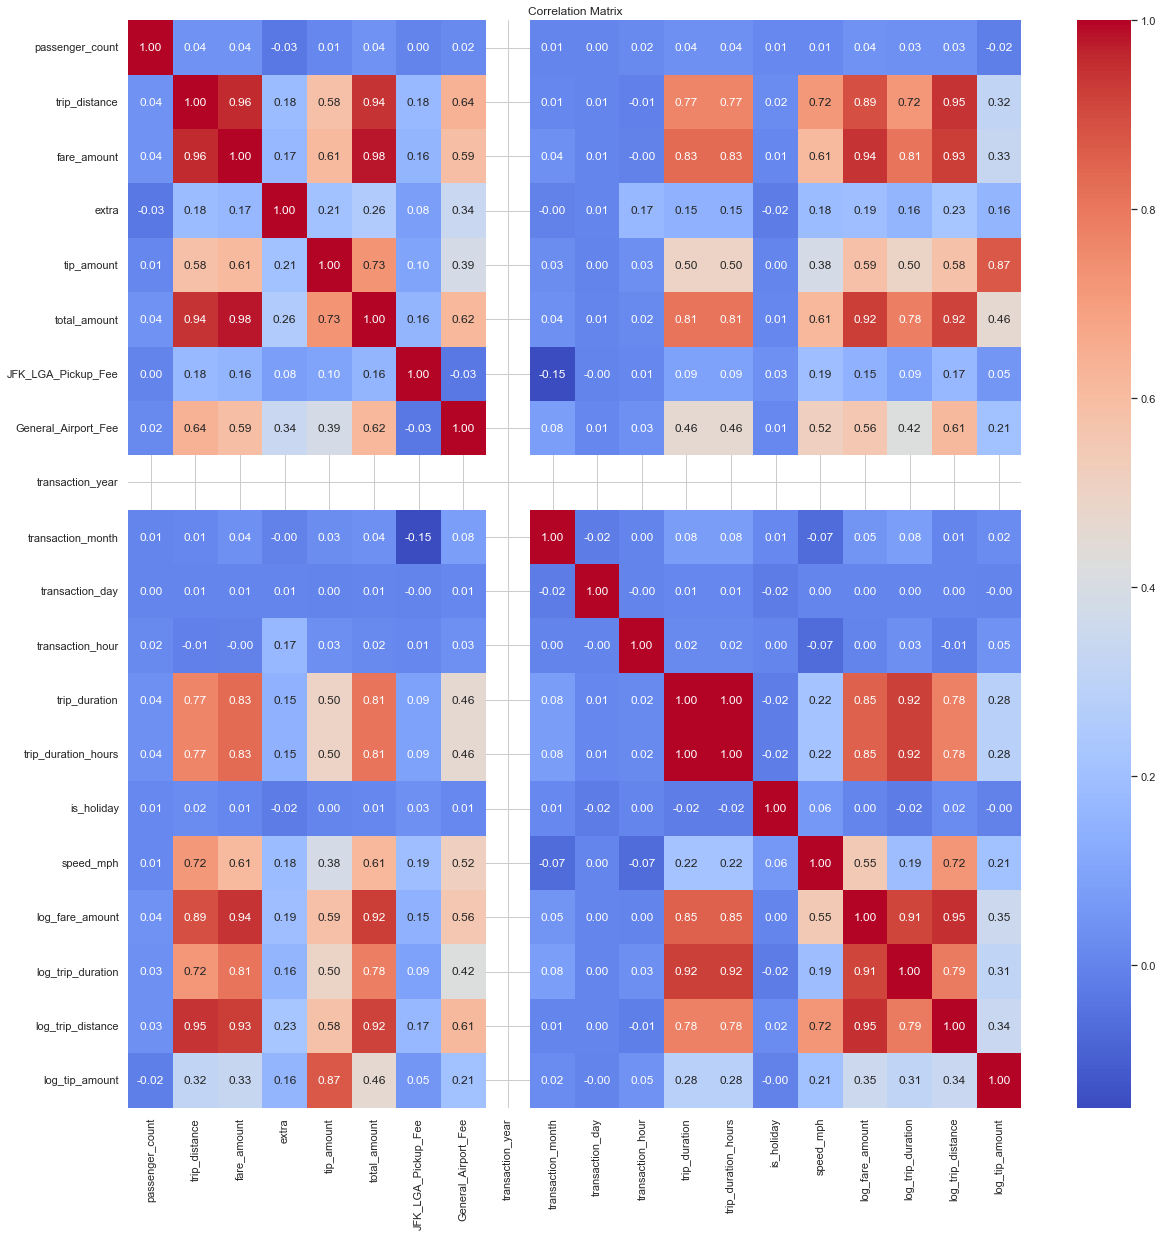

In [27]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Correlation Matrix and Heatmap
corr_matrix = new_df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [90]:


# List of selected numerical features based on their correlation to fare_amount
selected_numerical_features = [
    'fare_amount',
    'trip_duration',
    'trip_distance', 
    'total_amount', 
    'tip_amount', 
    'speed_mph', 
    'JFK_LGA_Pickup_Fee',
    'General_Airport_Fee'   
    
]

# Include all log-transformed columns and all categorical columns
log_transformed_features = [col for col in new_df.columns if col.startswith('log_')]
categorical_features = [
    'is_holiday', 
    'payment_type', 
    'pickup_time_of_day', 
    'pickup_season', 
    'passenger_count_category', 
    'pickup_day_type', 
    'PUzone', 
    'PUborough', 
    'DOzone', 
    'DOborough'
]

# Combine lists to form the final column list to retain
final_features = selected_numerical_features + log_transformed_features + categorical_features

# Filter the DataFrame to include only the selected features
filtered_df = new_df[final_features].copy()

# Convert 'is_holiday' to a categorical type, if not already
filtered_df['is_holiday'] = filtered_df['is_holiday'].astype('category')

# Display the first few rows of the filtered DataFrame
filtered_df.head()



,fare_amount,trip_duration,trip_distance,total_amount,tip_amount,speed_mph,JFK_LGA_Pickup_Fee,General_Airport_Fee,log_fare_amount,log_trip_duration,log_trip_distance,log_tip_amount,is_holiday,payment_type,pickup_time_of_day,pickup_season,passenger_count_category,pickup_day_type,PUzone,PUborough,DOzone,DOborough
19276873,19.100,20.367,2.320,30.720,5.120,6.835,0.000,0.000,3.001,3.062,1.200,1.812,0,1,afternoon,autumn,low,weekday,Midtown Center,Manhattan,East Village,Manhattan
25505385,17.700,18.933,1.900,25.200,3.500,6.021,0.000,0.000,2.929,2.992,1.065,1.504,0,1,afternoon,autumn,low,weekday,Midtown East,Manhattan,East Chelsea,Manhattan
23056552,8.600,8.950,1.100,12.100,2.000,7.374,0.000,0.000,2.262,2.298,0.742,1.099,0,1,afternoon,autumn,low,weekend,Manhattan Valley,Manhattan,East Harlem South,Manhattan
22171336,10.000,8.967,1.000,16.000,2.000,6.691,0.000,0.000,2.398,2.299,0.693,1.099,0,1,afternoon,autumn,low,weekday,Midtown Center,Manhattan,Lincoln Square East,Manhattan
25241061,7.900,5.783,1.070,14.880,2.980,11.101,0.000,0.000,2.186,1.914,0.728,1.381,0,1,afternoon,autumn,low,weekday,Upper West Side North,Manhattan,Manhattan Valley,Manhattan


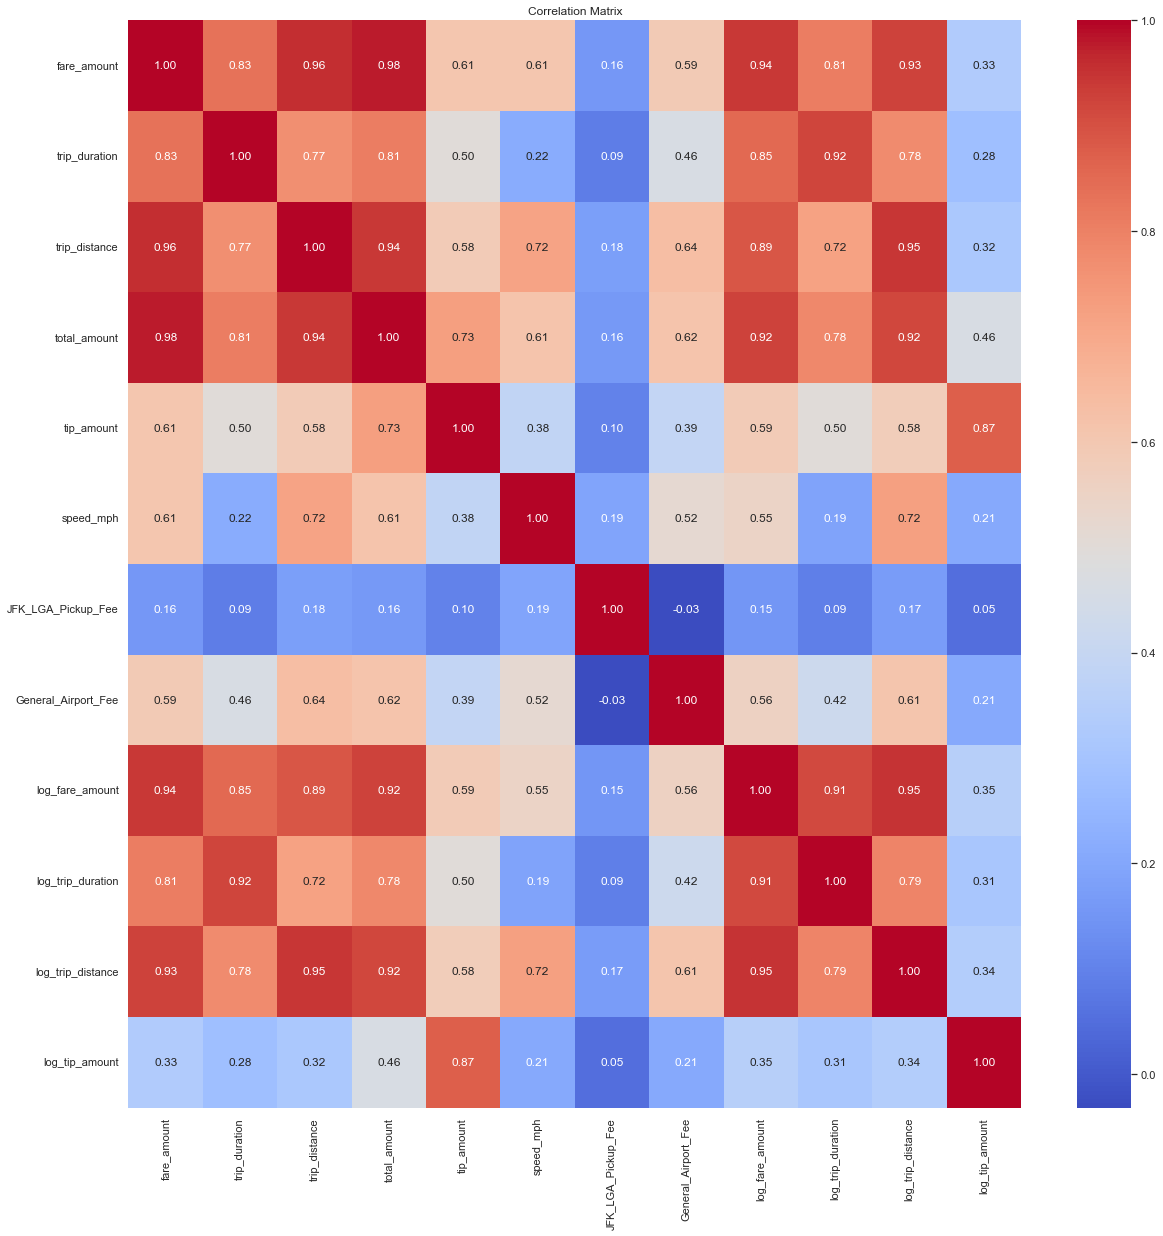

In [33]:
# Correlation Matrix and Heatmap
corr_matrix = filtered_df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


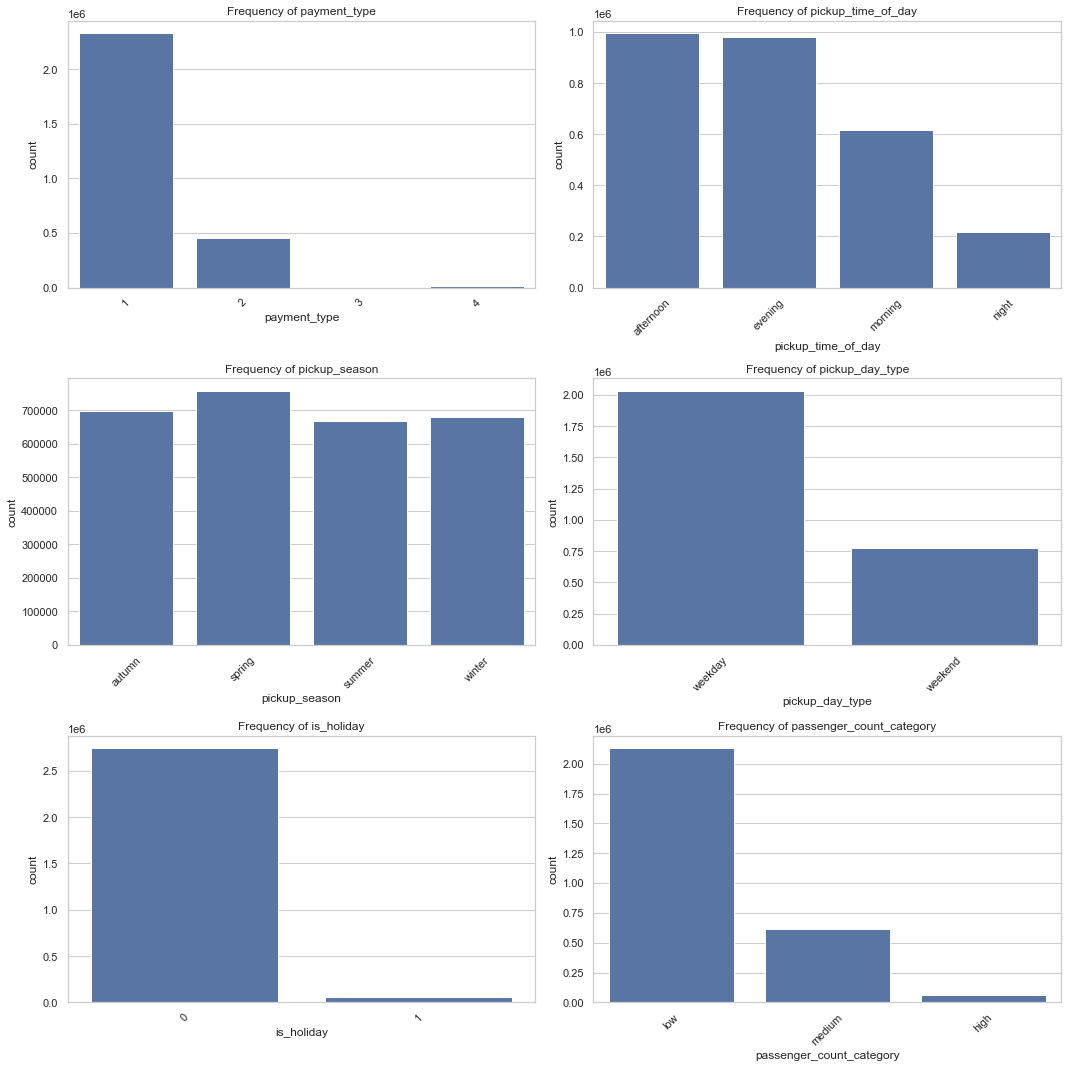

In [34]:
# List of categorical variables to plot
categorical_vars = ['payment_type', 'pickup_time_of_day', 'pickup_season', 'pickup_day_type','is_holiday','passenger_count_category']

plt.figure(figsize=(15, 15))  
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)  
    sns.countplot(x=var, data=filtered_df)
    plt.title(f'Frequency of {var}')
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

## Pariwise plotting

Based on the correlation matrix above and keeping in mind our main objective of the research is to predict fare amounts we will select featires that are highly correlated with fare amount for prediction purposes. 

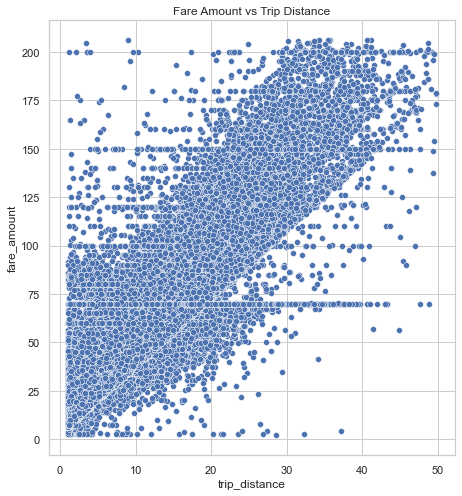

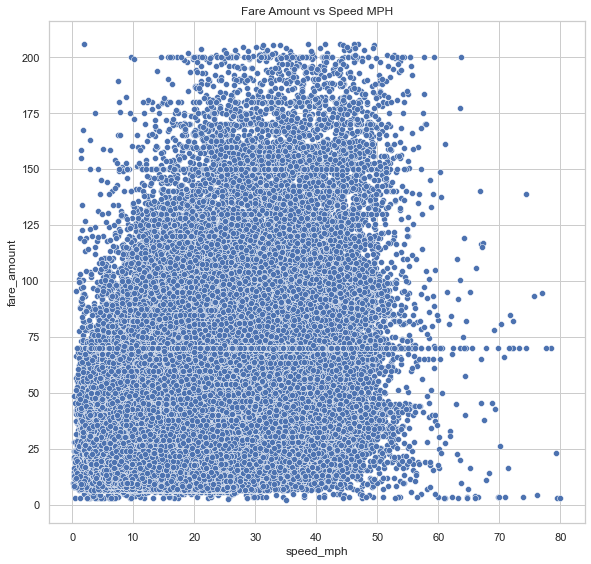

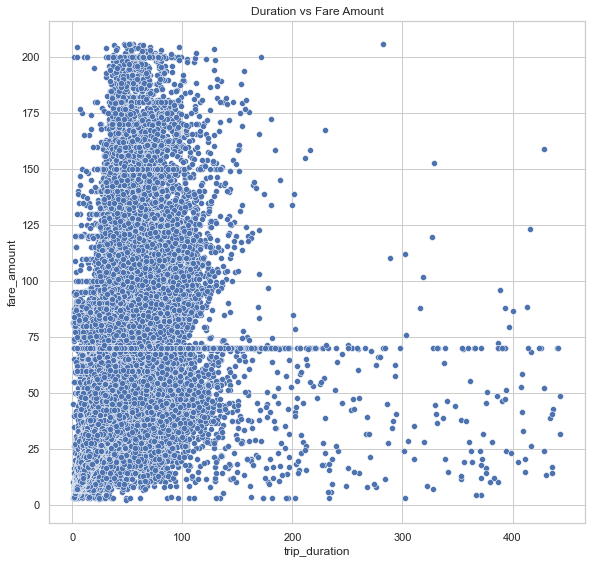

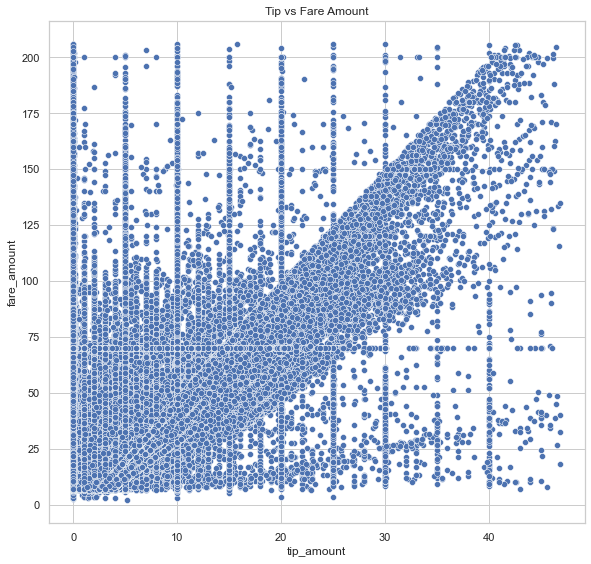

In [51]:

sns.set(style="whitegrid")

# 1. Targeted Scatter Plots
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df)
plt.title('Fare Amount vs Trip Distance')
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
sns.scatterplot(x='speed_mph', y='fare_amount', data=filtered_df)
plt.title('Fare Amount vs Speed MPH')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
sns.scatterplot(x='trip_duration', y='fare_amount', data=filtered_df)
plt.title('Duration vs Fare Amount')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
sns.scatterplot(x='tip_amount', y='fare_amount', data=filtered_df)
plt.title('Tip vs Fare Amount')
plt.tight_layout()
plt.show()



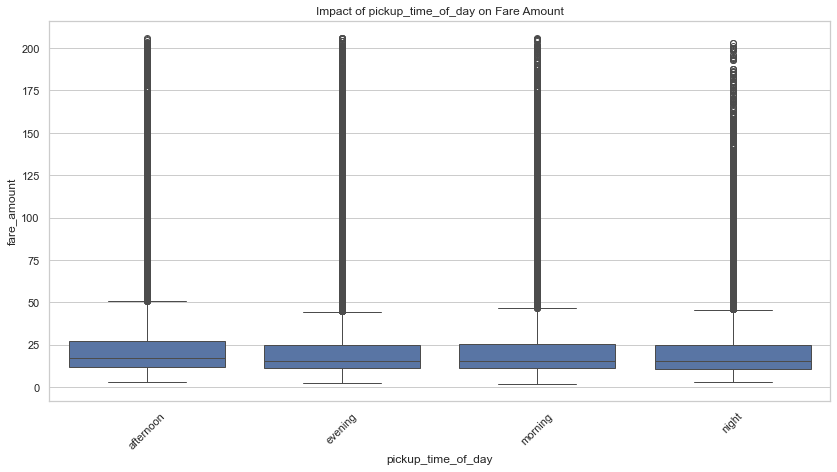

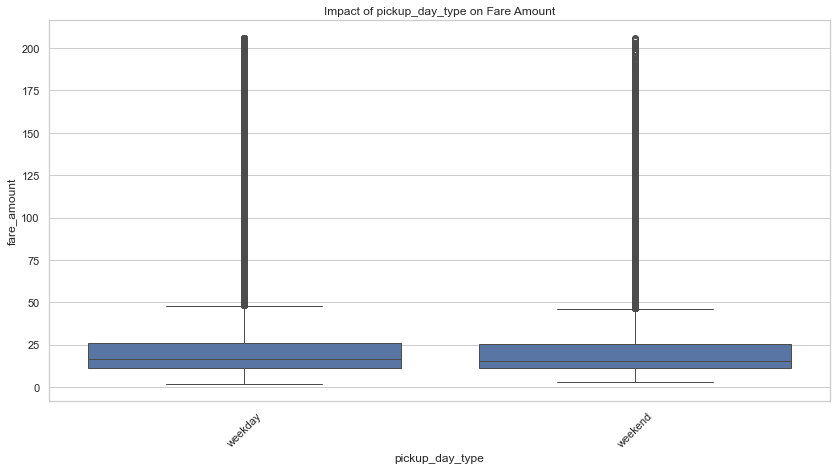

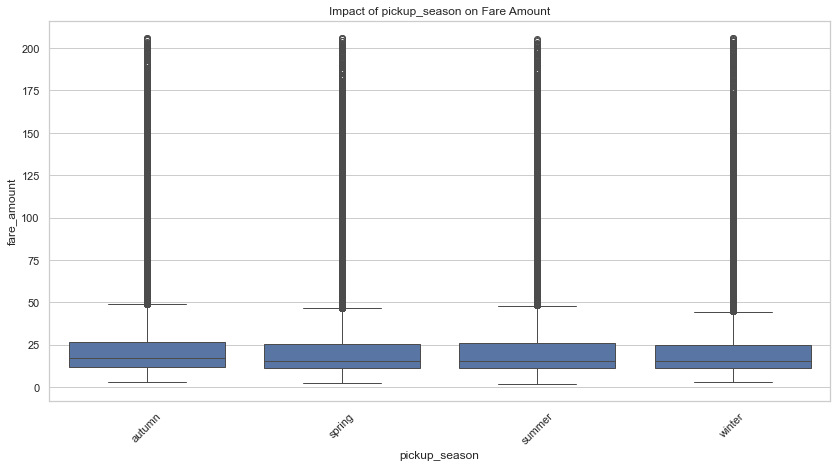

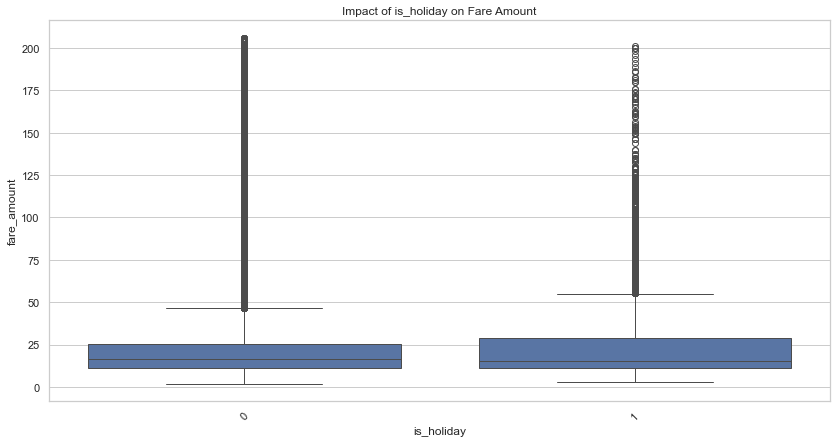

In [52]:

# Categorical Analysis with Box Plots
categorical_vars = ['pickup_time_of_day', 'pickup_day_type', 'pickup_season','is_holiday']
for var in categorical_vars:
    plt.figure(figsize=(14, 7))
    sns.boxplot(x=var, y='fare_amount', data=filtered_df)
    plt.title(f'Impact of {var} on Fare Amount')
    plt.xticks(rotation=45)
    plt.show()



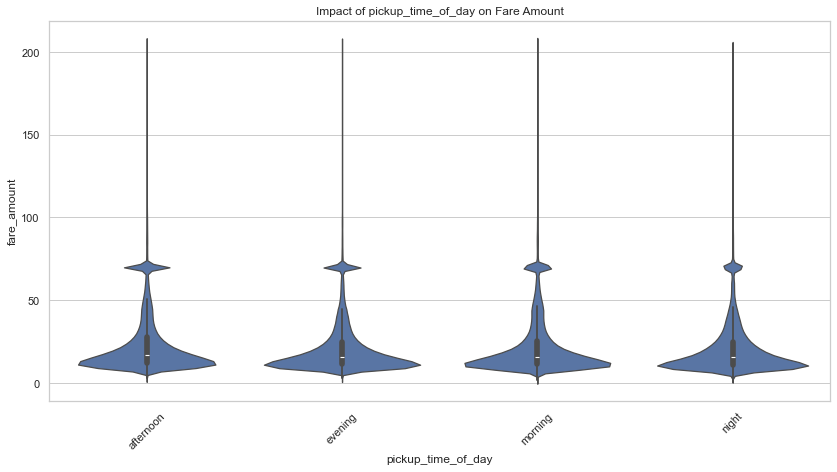

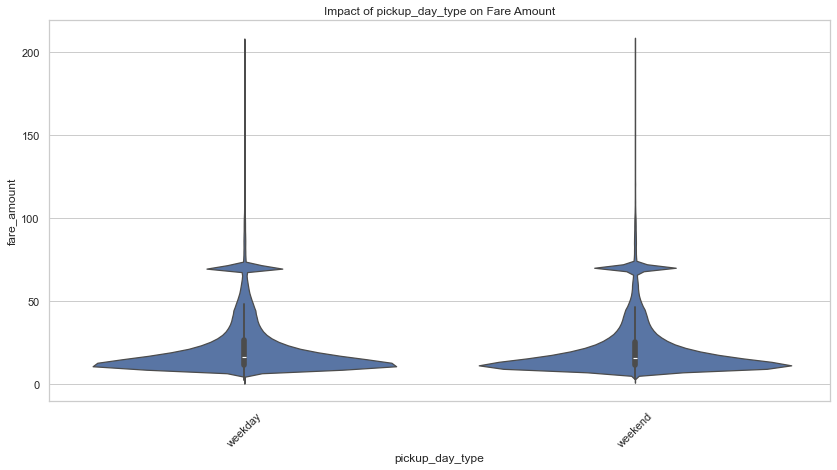

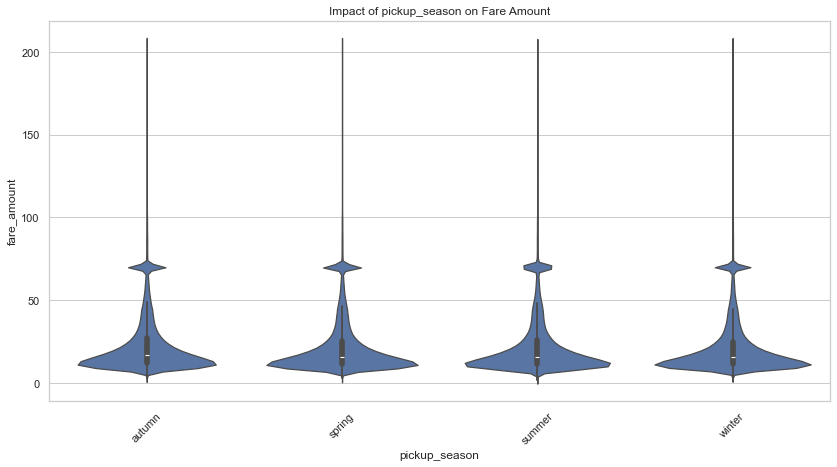

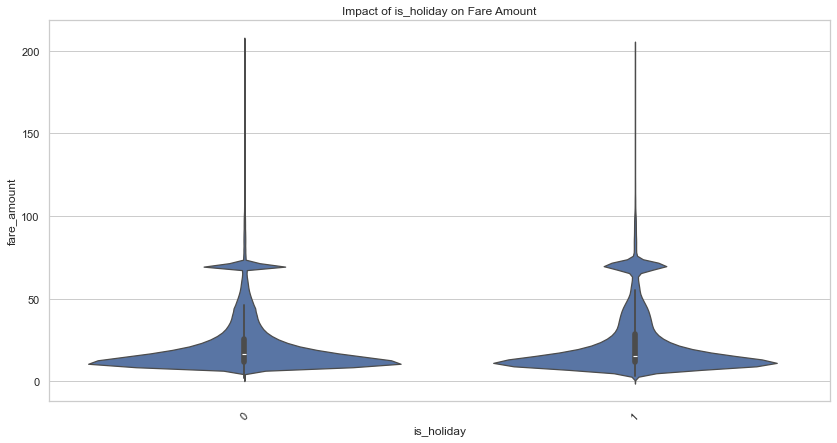

In [53]:
# Optionally, using violin plots for more detailed distribution information
for var in categorical_vars:
    plt.figure(figsize=(14, 7))
    sns.violinplot(x=var, y='fare_amount', data=filtered_df)
    plt.title(f'Impact of {var} on Fare Amount')
    plt.xticks(rotation=45)
    plt.show()

/var/folders/4d/8tkcz58x0md0_v7fj12j6ht80000gn/T/ipykernel_15851/2481244980.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zone_fares = filtered_df.groupby('PUborough')['fare_amount'].mean().reset_index()


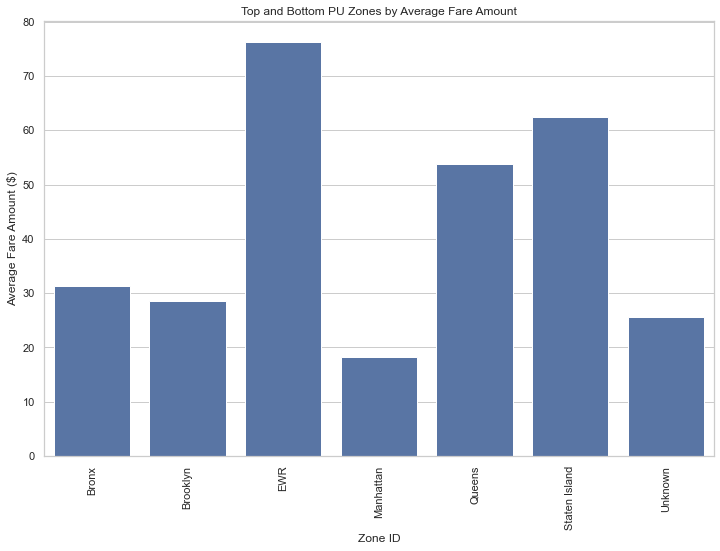

In [66]:

# Assuming df is your DataFrame and 'PULocationID' and 'fare_amount' are columns
# Group by 'PULocationID' and calculate average fare amount
zone_fares = filtered_df.groupby('PUborough')['fare_amount'].mean().reset_index()

# Sort zones by average fare amount to identify top and bottom zones
zone_fares_sorted = zone_fares.sort_values(by='fare_amount', ascending=False)

# Plotting top 10 and bottom 10 zones
top_zones = zone_fares_sorted.head(10)
bottom_zones = zone_fares_sorted.tail(10)

# Combine data for plotting
combined_zones = pd.concat([top_zones, bottom_zones])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='PUborough', y='fare_amount', data=combined_zones)
plt.title('Top and Bottom PU Zones by Average Fare Amount')
plt.xlabel('Zone ID')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=90)
plt.show()



/var/folders/4d/8tkcz58x0md0_v7fj12j6ht80000gn/T/ipykernel_15851/42734756.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zone_fares = filtered_df.groupby('DOborough')['fare_amount'].mean().reset_index()


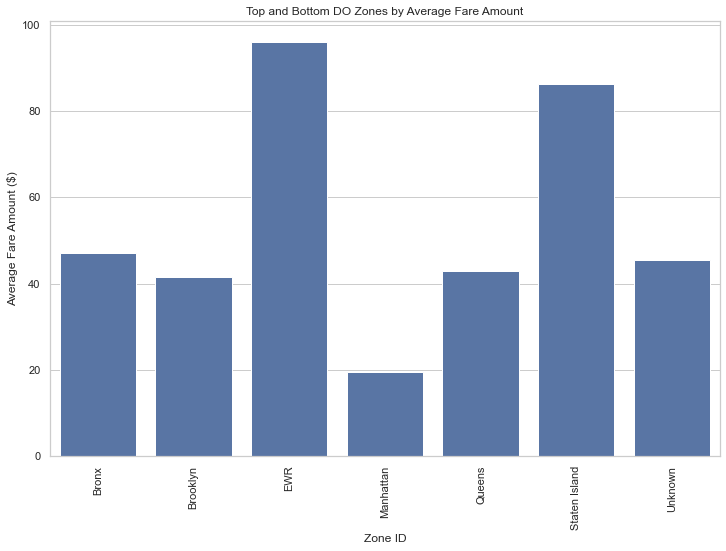

In [65]:

# Assuming df is your DataFrame and 'PULocationID' and 'fare_amount' are columns
# Group by 'PULocationID' and calculate average fare amount
zone_fares = filtered_df.groupby('DOborough')['fare_amount'].mean().reset_index()

# Sort zones by average fare amount to identify top and bottom zones
zone_fares_sorted = zone_fares.sort_values(by='fare_amount', ascending=False)

# Plotting top 10 and bottom 10 zones
top_zones = zone_fares_sorted.head(10)
bottom_zones = zone_fares_sorted.tail(10)

# Combine data for plotting
combined_zones = pd.concat([top_zones, bottom_zones])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='DOborough', y='fare_amount', data=combined_zones)
plt.title('Top and Bottom DO Zones by Average Fare Amount')
plt.xlabel('Zone ID')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=90)
plt.show()


Based on the multivariate plots provided

1. **Relationships between fare amount and other numerical variables**:
   - **Fare Amount vs Trip Distance**: There's a clear positive correlation where fare increases as trip distance increases. The relationship appears linear for a large range of distances but also shows significant variability in fare for similar distances, which might be influenced by other factors like traffic or route taken.
   - **Fare Amount vs Speed MPH**: The plot shows a less clear but somewhat positive relationship, where higher speeds tend to be associated with higher fares. This could indicate that faster trips, which might cover longer distances or require less time, tend to cost more.
   - **Duration vs Fare Amount**: Similar to distance, there is a positive correlation between trip duration and fare amount. Longer trips tend to have higher fares, but the variance in fare seems quite high across different durations.
   - **Tip vs Fare Amount**: There is a positive trend where higher fares tend to receive higher tips. This relationship is expected as tips are often a percentage of the fare.

2. **Impact of categorical variables on fare amount**:
   - **Time of Day**: Fares vary significantly throughout different times of the day, with peak hours likely reflecting higher fares due to increased demand or surge pricing.
   - **Day Type**: There's a noticeable difference in fares between weekdays and weekends, potentially due to different traffic patterns or rider behaviors.
   - **Season**: The plots indicate that fare amounts can vary by season, which might reflect changes in weather, tourism, or other seasonal activities affecting travel behavior.
   - **Holiday**: There are stark contrasts in fare amounts on holidays compared to non-holidays, likely due to special events or reduced traffic.

These insights can be utilized to refine the predictive modeling process, especially in terms of feature selection and engineering. Understanding these relationships helps in choosing the most relevant variables for the model and can guide the creation of interaction terms that might improve model accuracy. Additionally, it's crucial to consider the variance within these relationships, as it suggests the presence of other influencing factors or potential outliers that should be managed appropriately in the modeling stage.

### PCA Analysis

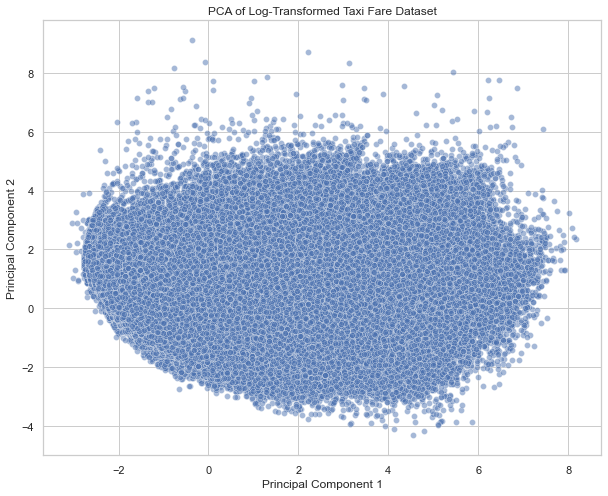

Explained Variance: [0.70734749 0.16056017]


In [91]:
# Assuming filtered_df is your pre-processed DataFrame
numerical_features = ['fare_amount', 'trip_distance', 'trip_duration', 'speed_mph', 'tip_amount']  # example features

# Imputing missing values
imputer = SimpleImputer(strategy='mean')  # or median, if more appropriate
filtered_df[numerical_features] = imputer.fit_transform(filtered_df[numerical_features])

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(filtered_df[numerical_features])

# Performing PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Adding PCA results back to the dataframe
filtered_df['PCA1'], filtered_df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

# Now filtered_df should have no NaNs in PCA1 and PCA2
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, alpha=0.5)
plt.title('PCA of Log-Transformed Taxi Fare Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print explained variance to understand how much information is captured by each component
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: The explained variance in your PCA output indicates that the first two principal components capture a substantial amount of information (approximately 86.6% combined). This is a good sign that these components are effectively summarizing the main patterns in the data.



In [92]:
# Display loadings for the first two principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=numerical_features)
print(loadings)


               PCA1   PCA2
fare_amount   0.516  0.079
trip_distance 0.517 -0.088
trip_duration 0.433  0.574
speed_mph     0.364 -0.801
tip_amount    0.383  0.124


The PCA output now indicates a successful computation without NaN values in the principal components, which allows for a more reliable interpretation of the data. The scatter plot of PCA1 and PCA2, along with the explained variance, shows how these components capture the variance in your dataset.

### Key Observations:
1. **Explained Variance**:
   - The first principal component (PCA1) explains a significant portion of the variance in the dataset. The explained variance ratio you've shown suggests that PCA1 and PCA2 together capture around 85.7% of the total variance. This is a good indication that these two components retain most of the information present in the original higher-dimensional data.

2. **PCA Loadings**:
   - The loadings (or weights) for each variable on the principal components indicate how much each feature contributes to the components. From your description:
     - **PCA1** has strong positive loadings for `fare_amount`, `trip_duration`, and `trip_distance`, suggesting that this component represents the overall magnitude of taxi operations where higher values of these variables contribute significantly.
     - **PCA2** appears to differentiate features like `speed_mph` and `tip_amount`, which may represent aspects of the trip quality or efficiency, such as faster trips or higher service appreciation reflected through tips.



In [107]:
filtered_df.to_parquet('/Users/md/Desktop/python_project/parquet_files/modeling_dataset_v.0.parquet')

In [98]:
# Select features for modeling
features = filtered_df[['PCA1', 'PCA2','is_holiday', 'pickup_time_of_day', 'pickup_season', 'passenger_count_category', 'pickup_day_type','PUzone','DOzone','JFK_LGA_Pickup_Fee','General_Airport_Fee']]
target = filtered_df['fare_amount']

# Encode categorical variables
categorical_features = ['is_holiday', 'pickup_time_of_day', 'pickup_season', 'passenger_count_category', 'pickup_day_type','PUzone','DOzone']
encoder = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

X = encoder.fit_transform(features)
y = target.values

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a simple Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = baseline_model.predict(X_val)

# Evaluate the baseline model
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Baseline Model Performance:')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


Baseline Model Performance:
RMSE: 3.6861698180581017
MAE: 2.153450923315468
R²: 0.9581911721820323


In [106]:
import pandas as pd

# Convert to dense format
X_train_dense = X_train.todense()
X_test_dense = X_test.todense()
X_val_dense = X_val.todense()

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_dense, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_dense, columns=X_test.columns)
X_val_df = pd.DataFrame(X_val_dense, columns=X_val.columns)

# Save as Parquet
X_train_df.to_parquet('X_train.parquet')
X_test_df.to_parquet('X_test.parquet')
X_val_df.to_parquet('X_val.parquet')
y_train.to_frame().to_parquet('y_train.parquet')
y_test.to_frame().to_parquet('y_test.parquet')
y_val.to_frame().to_parquet('y_val.parquet')


AttributeError: 'csr_matrix' object has no attribute 'columns'

In [104]:
# Save the training and test datasets as Parquet
X_train.to_parquet('X_train.parquet')
X_test.to_parquet('X_test.parquet')
y_train.to_parquet('y_train.parquet')
y_test.to_parquet('y_test.parquet')


AttributeError: 'csr_matrix' object has no attribute 'to_parquet'

In [103]:
pip install pandas pyarrow


Note: you may need to restart the kernel to use updated packages.


In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize and train the Random Forest model using Grid Search
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rf = grid_search.best_estimator_.predict(X_val)

# Evaluate the advanced model
rmse_rf = mean_squared_error(y_val, y_val_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

print(f'Advanced Model Performance:')
print(f'RMSE: {rmse_rf}')
print(f'MAE: {mae_rf}')
print(f'R²: {r2_rf}')


KeyboardInterrupt: 

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = encoder.get_feature_names_out()

# Print feature importances
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Validate model performance on the test set
y_test_pred_rf = grid_search.best_estimator_.predict(X_test)
rmse_test_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f'Test Set Performance:')
print(f'RMSE: {rmse_test_rf}')
print(f'MAE: {mae_test_rf}')
print(f'R²: {r2_test_rf}')



Including or excluding variables like trip distance, duration, and tip amount in the model after conducting PCA depends on the goals of the analysis and the nature of the PCA results. Here’s a breakdown of why these variables might be excluded:

### PCA and Variable Inclusion

1. **Redundancy and Collinearity**: 
   - PCA helps in reducing dimensionality by transforming multiple correlated variables into a smaller number of uncorrelated components.
   - If trip distance, duration, and tip amount are highly correlated with the principal components derived from PCA, including them directly in the model might introduce redundancy and multicollinearity. This can lead to less interpretable models and can inflate the variances of the estimated coefficients, making them unstable.

2. **Captured Variance**:
   - The principal components are linear combinations of the original variables that account for the maximum variance possible. 
   - If PCA1 and PCA2 capture significant information (variance) from trip distance, duration, and tip amount, these components effectively represent these variables in the transformed space. This reduces the need to include the original variables separately.

3. **Model Simplicity**:
   - Using PCA components instead of the original variables can simplify the model. This simplicity helps in avoiding overfitting and makes the model computationally efficient, especially when dealing with large datasets.
   - Simplified models are often preferable when the gain in prediction accuracy from adding more variables is marginal compared to the increase in complexity.

### When to Include Original Variables

Despite the advantages of PCA, there are situations where you might still consider including some original variables alongside PCA components:

- **Interpretability**: Principal components are often difficult to interpret directly because they are linear combinations of all the input variables. Including key variables directly in the model can help make the model outputs more interpretable, especially if those variables have clear and understandable effects on the response variable.
  
- **Partial Capture of Variance**: If PCA components do not capture all the relevant information or nuances of specific variables that are crucial for prediction accuracy, it might be beneficial to include those variables directly.

- **Model Performance**: Empirical testing is crucial. Comparing models with and without the original variables can provide insights into their impact on model performance. Sometimes, direct inclusion of a few original variables alongside PCA components yields better predictive accuracy.

### Example Modification for Inclusion

If you decide to include these variables based on model performance tests or for interpretability, here’s how you might adjust the data preparation step:

```python
# Adding original variables with PCA components
features = filtered_df[['PCA1', 'PCA2', 'trip_distance', 'trip_duration', 'tip_amount', 'is_holiday', 'payment_type', 'pickup_time_of_day', 'pickup_season', 'passenger_count_category', 'pickup_day_type']]

# Continue with encoding and splitting as shown previously
```

In conclusion, the decision to include or exclude original variables post-PCA is driven by the trade-offs between simplicity, performance, and interpretability. Testing different configurations and using domain knowledge about the importance of specific variables in your context are essential steps in this decision-making process.